In [48]:
import numpy as np
import pandas as pd

In [49]:
data = pd.read_csv('Dataset/Bengaluru_House_Data.csv')

In [50]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [51]:
data.shape

(13320, 9)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [53]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [55]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [57]:
data.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [58]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

<Axes: >

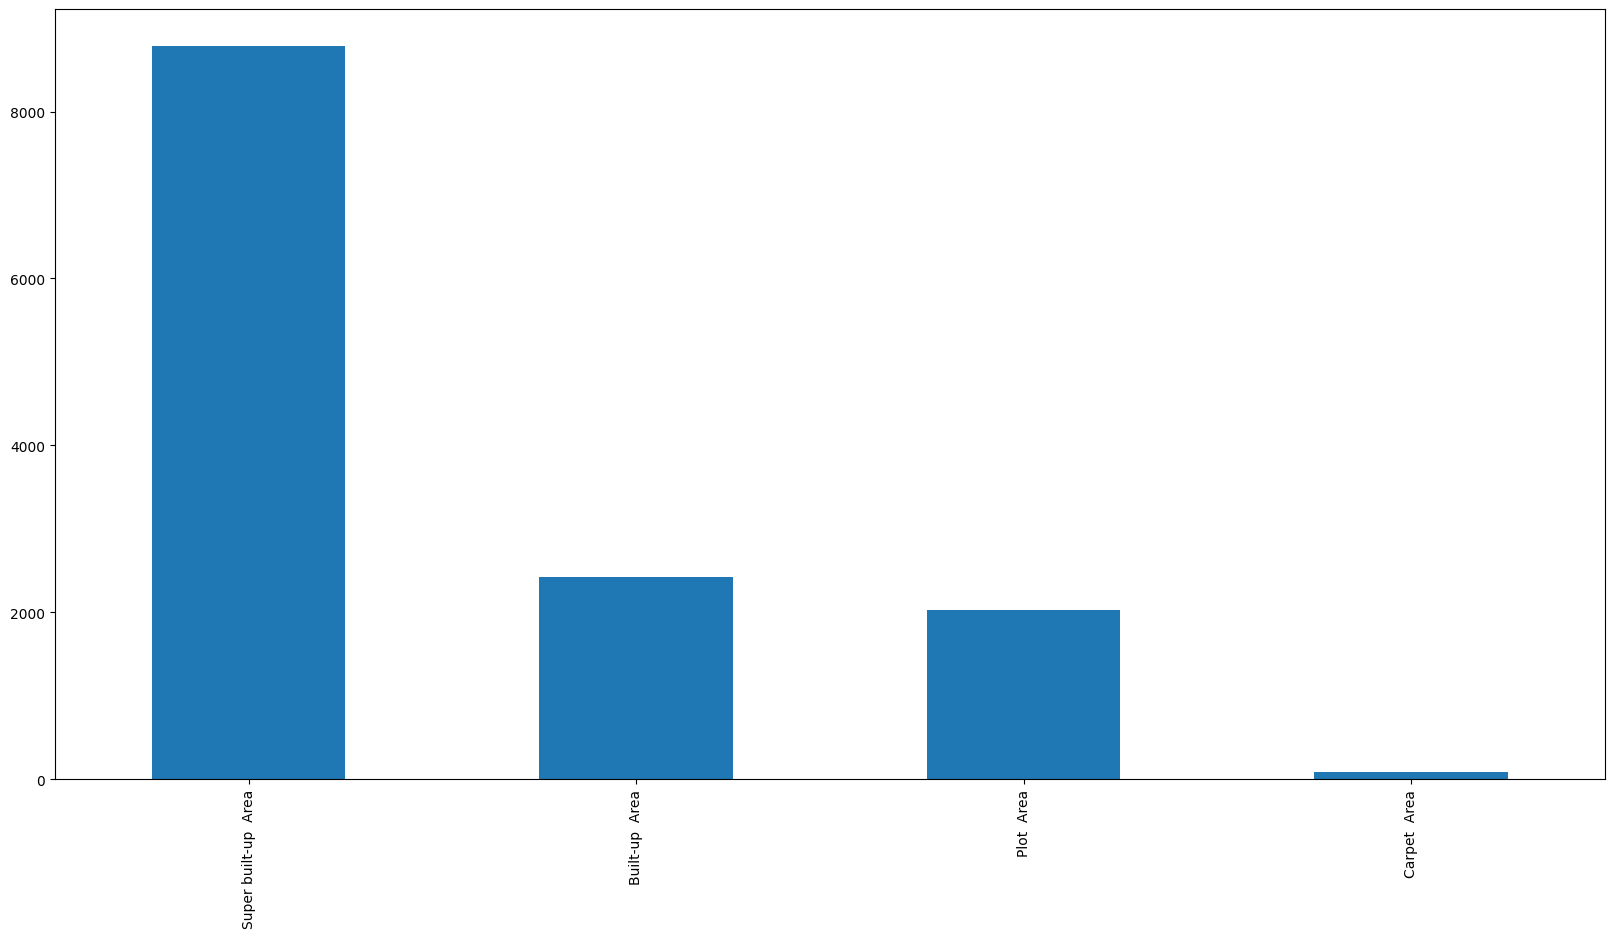

In [59]:
data.area_type.value_counts().plot(kind='bar')

In [60]:
data.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [61]:
data.drop(["area_type", "society","balcony", "availability"], axis = "columns", inplace=True)

In [62]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [64]:
data['location'] = data['location'].fillna(data["location"].mode()[0])

In [65]:
data.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [66]:
data['size'] = data['size'].fillna(data["size"].mode()[0])
data['bath'] = data['bath'].fillna(data["bath"].mode()[0])

In [67]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [68]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Creating a new column BHK from "size" 

In [69]:
data["BHK"] = data["size"].apply(lambda x: int(x.split(" ")[0])) 

In [70]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [71]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [72]:
def convert_range(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [73]:
data['total_sqft'] = data['total_sqft'].apply(convert_range)

In [74]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [75]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

In [76]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [77]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [78]:
data['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [79]:
# strip whitespaces from location column

data['location'] =  data['location'].apply(lambda x: x.strip())
data['location'].value_counts()

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [80]:
location_count = data['location'].value_counts()
location_count_less_10 = location_count[location_count <= 10]
location_count_less_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [81]:
data['location'] = data['location'].apply(lambda x: 'Other' if x in location_count_less_10 else x)

In [82]:
data['location'].value_counts()

Other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

## Finding outliers

In [83]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [84]:
(data['total_sqft']/data['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [85]:
# removing rows where one room sqft < 300
data = data[((data['total_sqft']/data['BHK']) >= 300)]
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [86]:
data.shape

(12530, 7)

In [87]:
def remove_outlier_sqft(df):
    out_df = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        std = np.std(sub_df.price_per_sqft)
        gen_df = sub_df[(sub_df.price_per_sqft > (m-std)) & (sub_df.price_per_sqft <= (m+std))]
        out_df = pd.concat([out_df,gen_df], ignore_index=True)
    return out_df

data = remove_outlier_sqft(data)
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [88]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index")

In [89]:
data = remove_bhk_outliers(data)

In [90]:
data

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10290,Yeshwanthpur,2 BHK,1195.0,2.0,100.0,2,8368.200837
10291,Yeshwanthpur,3 BHK,1692.0,3.0,108.0,3,6382.978723
10293,Yeshwanthpur,6 Bedroom,2500.0,5.0,185.0,6,7400.000000
10298,Yeshwanthpur,3 BHK,1855.0,3.0,135.0,3,7277.628032


In [91]:
data.shape

(7361, 7)

In [92]:
# drop unused columns
data.drop(columns=["size","price_per_sqft"],inplace=True)

In [93]:
data.to_csv("Cleaned_data.csv")

In [94]:
X = data.drop(columns=["price"])
y = data['price']

In [95]:
data[data.bath>10]

,location,total_sqft,bath,price,BHK
5313,Neeladri Nagar,4000.0,12.0,160.0,10
5962,Other,12000.0,12.0,525.0,10
6051,Other,10000.0,16.0,550.0,16
6784,Other,6000.0,12.0,150.0,11
7116,Other,5425.0,13.0,275.0,13


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
print(X_train.shape)
print(X_test.shape)

(5888, 4)
(1473, 4)


In [99]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']), remainder='passthrough')

In [100]:
scaler = StandardScaler()

In [101]:
lr = LinearRegression()

In [102]:
pipe = make_pipeline(column_trans, scaler, lr)

In [103]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [104]:
y_pred_lr = pipe.predict(X_test)

In [105]:
r2_score(y_test,y_pred_lr)

0.8445123322769893

In [106]:
import pickle

In [107]:
pickle.dump(pipe, open('LinearRegression.pkl','wb'))

In [108]:
ridge = Ridge()

In [109]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [110]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [111]:
y_pred_ridge = pipe.predict(X_test)

In [112]:
r2_score(y_test, y_pred_ridge)

0.8444920125362624

In [113]:
lasso = Lasso()

In [114]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [115]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [116]:
y_pred_lasso = pipe.predict(X_test)

In [117]:
r2_score(y_test, y_pred_lasso)

0.8361948965430535